In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
data=pd.read_csv('reviews_hong.csv')

In [9]:
data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...


In [10]:
data.drop(['reviewer_id', 'reviewer_name', 'comments'], axis=1, inplace=True)


In [11]:
data.rename({'id':'review_count'}, axis=1, inplace=True)
data.review_count = 1

In [12]:
print("The first dataset has {} rows and {} columns.".format(*data.shape))
print("It contains {} duplicates.".format(data.duplicated().sum()))

The first dataset has 126679 rows and 3 columns.
It contains 1999 duplicates.


In [13]:
data.date = pd.to_datetime(data.date, format="%Y-%m-%d")

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126679 entries, 0 to 126678
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   listing_id    126679 non-null  int64         
 1   review_count  126679 non-null  int64         
 2   date          126679 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.9 MB


In [15]:
data.tail(2)

,listing_id,review_count,date
126677,52653198,1,2021-10-12
126678,52653198,1,2021-10-18


In [16]:
from datetime import datetime
data=data.sort_values('date')

In [17]:
data
df_raw=data

In [18]:
data

,listing_id,review_count,date
21,5506,1,2009-03-21
22,5506,1,2009-05-01
130,6695,1,2009-08-06
131,6695,1,2009-08-23
23,5506,1,2009-09-14
...,...,...,...
61055,15018607,1,2021-10-19
100278,28494167,1,2021-10-19
116169,42975758,1,2021-10-19
126444,51446014,1,2021-10-19


In [19]:
count_2020_21=data[data["date"].isin(pd.date_range('2020-10-01', '2021-10-19'))]
count_2020_19=data[data["date"].isin(pd.date_range('2019-01-01', '2020-12-31'))]


In [20]:
count_2020_21.head(30)

,listing_id,review_count,date
96373,25933888,1,2020-10-01
115684,42065558,1,2020-10-01
107609,34149470,1,2020-10-01
28015,5769127,1,2020-10-01
38244,7513906,1,2020-10-01
4885,561769,1,2020-10-01
39921,7713815,1,2020-10-01
118143,45449241,1,2020-10-01
36739,7474044,1,2020-10-01
75475,18875553,1,2020-10-01


In [21]:
print("The dataset 2017/2018 has {} reviews and {} columns.".format(*count_2020_21.shape))

The dataset 2017/2018 has 25997 reviews and 3 columns.


In [22]:
count_2020_21 = count_2020_21.set_index('date').sort_index()

In [23]:
count_2020_21_monthly = count_2020_21.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(reviews_per_month='count').reset_index()
                                                                       

In [24]:
count_2020_21_monthly.columns = ['date', 'listing_id', 'reviews_per_month']

In [25]:
count_2020_21_monthly.set_index('date', inplace=True)

In [26]:
count_2020_21_monthly.head(5)

,listing_id,reviews_per_month
date,,
2020-10-31,197972,2
2020-10-31,210097,3
2020-10-31,257588,2
2020-10-31,561769,1
2020-10-31,743211,1


In [27]:
count_2020_21_monthly=count_2020_21_monthly.reset_index()
count_2020_21_monthly=pd.DataFrame(count_2020_21_monthly.groupby('listing_id')['reviews_per_month'].mean().reset_index())

In [28]:
count_2020_21_monthly.head(50)

,listing_id,reviews_per_month
0,3781,1.000000
1,5506,1.000000
2,6695,1.000000
3,10813,1.000000
4,29765,1.000000
5,40601,1.000000
6,45987,1.000000
7,60029,1.000000
8,67774,1.000000
9,77681,1.000000


In [29]:
data_list=pd.read_csv("listings_hong.csv")

In [30]:
data_list.tail(
)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3244,52856176,https://www.airbnb.com/rooms/52856176,20211019170555,2021-10-19,Bright 2 bed/2 bath condo with fireplace!,Enjoy a stay in Boston in the South Boston dis...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22088530,https://www.airbnb.com/users/show/22088530,...,NaN,NaN,NaN,STR-461030,t,1,1,0,0,NaN
3245,52863673,https://www.airbnb.com/rooms/52863673,20211019170555,2021-10-19,"Cozy Studio Near MGH, Low Density Area",Corporate-style studio in the heart of Boston....,NaN,https://a0.muscache.com/pictures/4bbf0840-63c1...,2356643,https://www.airbnb.com/users/show/2356643,...,NaN,NaN,NaN,STR-428031,f,31,12,19,0,NaN
3246,52872248,https://www.airbnb.com/rooms/52872248,20211019170555,2021-10-20,Furnished Room in Brighton Location,$200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...,NaN,https://a0.muscache.com/pictures/fdf33796-03c3...,297860058,https://www.airbnb.com/users/show/297860058,...,NaN,NaN,NaN,NaN,f,158,3,155,0,NaN
3247,52872801,https://www.airbnb.com/rooms/52872801,20211019170555,2021-10-19,Furnished Room in Brighton Location,$200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...,NaN,https://a0.muscache.com/pictures/8a6a842a-3c52...,297860058,https://www.airbnb.com/users/show/297860058,...,NaN,NaN,NaN,NaN,f,158,3,155,0,NaN
3248,52873214,https://www.airbnb.com/rooms/52873214,20211019170555,2021-10-19,Furnished Room in Allston Location,$200/MONTHLY FLEXIBILITY FEE<br />Unsure of ho...,NaN,https://a0.muscache.com/pictures/3e2db66a-b859...,297860058,https://www.airbnb.com/users/show/297860058,...,NaN,NaN,NaN,NaN,f,158,3,155,0,NaN


In [31]:
data_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [32]:
data_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3249 entries, 0 to 3248
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3249 non-null   int64  
 1   listing_url                                   3249 non-null   object 
 2   scrape_id                                     3249 non-null   int64  
 3   last_scraped                                  3249 non-null   object 
 4   name                                          3249 non-null   object 
 5   description                                   3221 non-null   object 
 6   neighborhood_overview                         2136 non-null   object 
 7   picture_url                                   3249 non-null   object 
 8   host_id                                       3249 non-null   int64  
 9   host_url                                      3249 non-null   o

In [33]:
data_main=pd.merge(count_2020_21_monthly,data_list[['id', 'price', 'neighbourhood_group_cleansed', 
                          'latitude', 'longitude', 'property_type', 'accommodates', 
                          'bathrooms','room_type', 'bedrooms', 'beds', 'host_is_superhost','minimum_nights']], 
              left_on='listing_id', right_on='id')

In [34]:
data_main.drop(['id'], axis=1, inplace=True)

In [35]:
data_main.rename({'neighbourhood_group_cleansed':'neighbourhood'}, axis=1, inplace=True)

In [36]:
print("The dataset has {} rows and {} columns - after combining it.".format(*data_main.shape))
print("It contains {} duplicates.".format(data_main.duplicated().sum()))
data_main.head(50)

The dataset has 1574 rows and 14 columns - after combining it.
It contains 0 duplicates.


,listing_id,reviews_per_month,price,neighbourhood,latitude,longitude,property_type,accommodates,bathrooms,room_type,bedrooms,beds,host_is_superhost,minimum_nights
0,3781,1.000000,$125.00,NaN,42.36413,-71.02991,Entire rental unit,2,NaN,Entire home/apt,1.0,0.0,t,32
1,5506,1.000000,$124.00,NaN,42.32844,-71.09581,Entire guest suite,2,NaN,Entire home/apt,1.0,1.0,t,3
2,6695,1.000000,$164.00,NaN,42.32802,-71.09387,Entire condominium (condo),4,NaN,Entire home/apt,NaN,0.0,t,3
3,10813,1.000000,$116.00,NaN,42.35061,-71.08787,Entire rental unit,3,NaN,Entire home/apt,NaN,1.0,t,29
4,29765,1.000000,$230.00,NaN,42.37754,-71.06642,Entire rental unit,2,NaN,Entire home/apt,1.0,1.0,f,2
5,40601,1.000000,$100.00,NaN,42.31347,-71.11082,Private room in residential home,2,NaN,Private room,1.0,1.0,t,10
6,45987,1.000000,$125.00,NaN,42.37424,-71.06081,Entire rental unit,3,NaN,Entire home/apt,1.0,0.0,t,29
7,60029,1.000000,$80.00,NaN,42.32546,-71.08894,Private room in rental unit,1,NaN,Private room,1.0,1.0,f,7
8,67774,1.000000,$90.00,NaN,42.35689,-71.06206,Entire condominium (condo),3,NaN,Entire home/apt,1.0,1.0,t,91
9,77681,1.000000,$140.00,NaN,42.37865,-71.06373,Private room in rental unit,2,NaN,Private room,1.0,1.0,f,2


In [37]:
data_main['minimum_nights'].mean()


14.155019059720457

In [38]:
data_main['reviews_per_month'].mean()

2.5574857515772367

In [39]:
data_main.price = data_main.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [40]:
data_main['price'].describe()

count    1574.000000
mean      199.809403
std       163.862801
min         0.000000
25%        98.250000
50%       159.000000
75%       246.000000
max      2589.000000
Name: price, dtype: float64

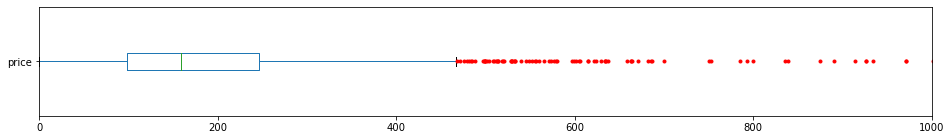

In [41]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data_main['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

75% of data is 246 dollars .so lets remove extremly priced above 450 

In [44]:
data_main.drop(data_main[data_main['price'] > 450].index, axis=0, inplace=True)
data_main['price'].describe()

count    1478.000000
mean      170.205007
std        98.409748
min         0.000000
25%        95.000000
50%       150.000000
75%       222.500000
max       450.000000
Name: price, dtype: float64

Monthly Occupancy Rate = Average Length of Stay * (No. of reviews per Month / Review Rate)
According to the latest Airbnb update, guests who booked stays in Hong-Kong in 2021 via Airbnb spent 4.5 nights here on average.

Yearly Income = Monthly Occupancy Rate Price 12 Months

In [63]:
avg_length_of_stay=4.5
review_rate_modest=0.5

In [64]:
data_main['modest_occupancy'] = round(avg_length_of_stay * (data_main['reviews_per_month']/review_rate_modest), 2)

In [65]:
len(data_main[data_main['modest_occupancy'] > 100])

0

In [66]:
data_main.drop(data_main[(data_main['modest_occupancy'] > 100)].index, axis=0, inplace=True)

In [67]:
data_main['modest_occupancy'].describe()

count    1178.000000
mean       15.834024
std         7.336388
min         9.000000
25%         9.000000
50%        13.500000
75%        22.067500
max        31.500000
Name: modest_occupancy, dtype: float64

In [68]:
data_main['optimistic_occupancy'] = round(avg_length_of_stay * (data_main['reviews_per_month']/0.4), 2)

In [69]:
len(data_main[data_main['optimistic_occupancy'] > 100])

0

In [70]:
data_main['optimistic_occupancy'].describe()

count    1178.000000
mean       19.792530
std         9.170417
min        11.250000
25%        11.250000
50%        16.880000
75%        27.582500
max        39.380000
Name: optimistic_occupancy, dtype: float64

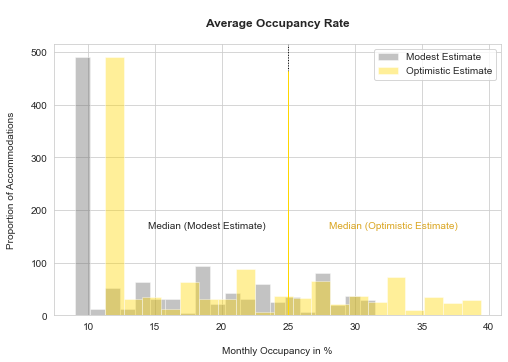

In [92]:

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(data_main['modest_occupancy'], kde=False, bins=20, color='dimgrey')
sns.distplot(data_main['optimistic_occupancy'], kde=False, bins=20, color='gold')

plt.title('\nAverage Occupancy Rate\n', fontweight='bold')
plt.legend(['Modest Estimate', 'Optimistic Estimate'])
plt.xlabel('\nMonthly Occupancy in %')
plt.ylabel('Proportion of Accommodations\n')

# draw and label a line with median value of modest estimate
plt.axvline(x=25, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(14.5, 165, 'Median (Modest Estimate)')

# draw and label a line with median value of optimistic estimate
plt.axvline(x=25, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='gold')
plt.text(28, 165, 'Median (Optimistic Estimate)', color='goldenrod');

In [72]:
data_main['modest_income'] = data_main['modest_occupancy'] * data_main['price'] * 12
data_main.modest_income.describe()

count      1178.000000
mean      33336.900306
std       27065.959669
min           0.000000
25%       12960.000000
50%       25677.000000
75%       44874.000000
max      141350.400000
Name: modest_income, dtype: float64

In [73]:
data_main['optimistic_income'] = data_main['optimistic_occupancy'] * data_main['price'] * 12
data_main.optimistic_income.describe()

count      1178.000000
mean      41671.293107
std       33832.810513
min           0.000000
25%       16200.000000
50%       32093.400000
75%       56096.370000
max      176688.000000
Name: optimistic_income, dtype: float64

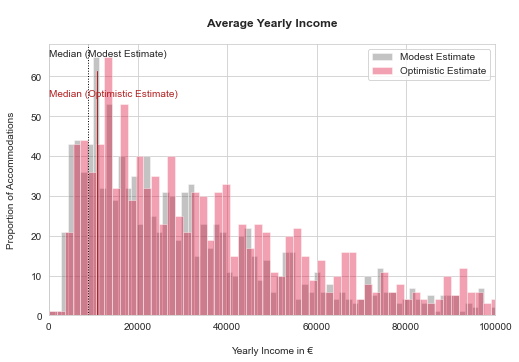

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(data_main['modest_income'], kde=False, bins=100, color='dimgrey')
sns.distplot(data_main['optimistic_income'], kde=False, bins=100, color='crimson')

plt.title('\nAverage Yearly Income\n', fontweight='bold')
plt.legend(['Modest Estimate', 'Optimistic Estimate'])
plt.xlabel('\nYearly Income in €')
plt.xlim((0,100000))
plt.ylabel('Proportion of Accommodations\n')

# draw and label a line with median value of modest estimate
plt.axvline(x=8709, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(60, 65, 'Median (Modest Estimate)')

# draw and label a line with median value of optimistic estimate
plt.axvline(x=10886, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='firebrick')
plt.text(100, 55, 'Median (Optimistic Estimate)', color='firebrick');

# To examine if there's an underlying seasonality, let's split the dataset we loaded at the very beginning by year


In [54]:
df_raw.tail(100)

,listing_id,review_count,date
74601,18584891,1,2021-10-17
125321,50187850,1,2021-10-17
109322,35836205,1,2021-10-17
126381,51329497,1,2021-10-17
121751,48014985,1,2021-10-17
...,...,...,...
61055,15018607,1,2021-10-19
100278,28494167,1,2021-10-19
116169,42975758,1,2021-10-19
126444,51446014,1,2021-10-19


In [119]:
pf=df_raw[df_raw["date"].isin(pd.date_range('2021-01-01', '2021-10-10'))]

count_2021=pf
count_2021 = count_2021.set_index('date').sort_index()

In [120]:
count_2021

,listing_id,review_count
date,,
2021-01-01,36237250,1
2021-01-01,36237250,1
2021-01-01,45349148,1
2021-01-01,36237250,1
2021-01-01,36237250,1
...,...,...
2021-10-10,41283883,1
2021-10-10,14868157,1
2021-10-10,29664067,1


In [140]:
count_2021 = df_raw[df_raw["date"].isin(pd.date_range('2021-01-01', '2021-10-19'))]
count_2020 = df_raw[df_raw["date"].isin(pd.date_range('2020-01-01', '2020-12-31'))]
count_2019 = df_raw[df_raw["date"].isin(pd.date_range('2019-01-01', '2019-12-31'))]
count_2018 = df_raw[df_raw["date"].isin(pd.date_range('2018-01-01', '2018-12-31'))]


# set the date as index and sort by index
count_2021 = count_2021.set_index('date').sort_index()
count_2020 = count_2020.set_index('date').sort_index()
count_2019 = count_2019.set_index('date').sort_index()
count_2018 = count_2018.set_index('date').sort_index()

# calculate reviews per month    
count_2021_monthly = count_2021.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_21='count').reset_index()
count_2020_monthly = count_2020.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_20='count').reset_index()
count_2019_monthly = count_2019.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_19='count').reset_index()
count_2018_monthly = count_2018.groupby([pd.Grouper(freq='M'), 'listing_id'])['review_count'].agg(review_count_18='count').reset_index()

# flatten the multi-index
count_2021_monthly.columns = ['date', 'listing_id', 'reviews_per_month_21']
count_2020_monthly.columns = ['date', 'listing_id', 'reviews_per_month_20']
count_2019_monthly.columns = ['date', 'listing_id', 'reviews_per_month_19']
count_2018_monthly.columns = ['date', 'listing_id', 'reviews_per_month_18']

# set date as index
count_2021_monthly.set_index('date', inplace=True)
count_2020_monthly.set_index('date', inplace=True)
count_2019_monthly.set_index('date', inplace=True)
count_2018_monthly.set_index('date', inplace=True)


In [141]:
count_2021_monthly

,listing_id,reviews_per_month_21
date,,
2021-01-31,190170,1
2021-01-31,197727,1
2021-01-31,197972,1
2021-01-31,561769,1
2021-01-31,891661,1
...,...,...
2021-10-31,52613030,1
2021-10-31,52614016,1
2021-10-31,52615785,1


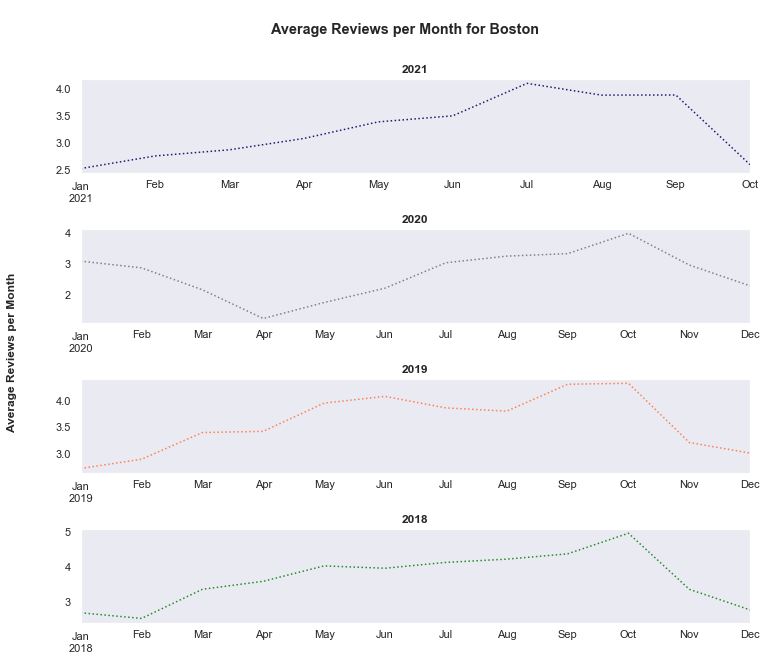

In [142]:
sns.set(style="dark")
fig, axes = plt.subplots(4, 1, figsize=(12,10))

sub_1 = count_2021_monthly.groupby('date')['reviews_per_month_21'].mean()
sub_1.plot(ax=axes[0], color='midnightblue', style=':')
axes[0].set_title('2021', fontweight='bold')
axes[0].set_xlabel('') 

sub_2 = count_2020_monthly.groupby('date')['reviews_per_month_20'].mean()
sub_2.plot(ax=axes[1], color='grey', style=':')
axes[1].set_title('2020', fontweight='bold')
axes[1].set_xlabel('') 

sub_3 = count_2019_monthly.groupby('date')['reviews_per_month_19'].mean()
sub_3.plot(ax=axes[2], color='coral', style=':')
axes[2].set_title('2019', fontweight='bold')
axes[2].set_xlabel('') 

sub_4 = count_2018_monthly.groupby('date')['reviews_per_month_18'].mean()
sub_4.plot(ax=axes[3], color='forestgreen', style=':')
axes[3].set_title('2018', fontweight='bold')
axes[3].set_xlabel('') 



# adjust space between subplots and set a title
plt.subplots_adjust(hspace = 0.6)
plt.suptitle('\nAverage Reviews per Month for Boston\n', fontweight='bold')

# plot common y-label
fig.text(0.04, 0.5, 'Average Reviews per Month', fontweight='bold', va='center', rotation='vertical');

# from above dataset we can observe that october is the peak season 
may-september there is peak season and then 

# sipke_detection


# 2019

In [97]:
count_2021 = data[data["date"].isin(pd.date_range('2019-01-01', '2021-10-19'))]


In [98]:
data2 = data[data["date"].isin(pd.date_range('2019-01-01', '2019-12-31'))]

In [113]:
season_19=pd.merge(data2,data_list[['id', 'price','property_type']], 
              left_on='listing_id', right_on='id')
season_19.drop(['review_count', 'id'], axis='columns', inplace=True)
season_19.price =season_19.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [114]:
season_19_peak=season_19[season_19["date"].isin(pd.date_range('2019-05-01', '2019-6-30'))]
season_19_peak_2=season_19[season_19["date"].isin(pd.date_range('2019-09-01', '2019-10-31'))]
p1=season_19_peak_2['price'].mean()
p2=season_19_peak['price'].mean()
res1=(p1+p2)/2
season_19_off=season_19[season_19["date"].isin(pd.date_range('2019-11-01', '2019-12-31'))]
season_19_off
p3=season_19_off['price'].mean()
season_19_off2=season_19[season_19["date"].isin(pd.date_range('2019-01-01', '2019-02-28'))]
p4=season_19_off2['price'].mean()
res2=(p3+p4)/2
(res1-res2)/res1

-0.07492066986054177

In [115]:
data3 = data[data["date"].isin(pd.date_range('2018-01-01', '2018-12-31'))]

In [116]:
data3

,listing_id,review_count,date
69212,17559846,1,2018-01-01
17170,3343428,1,2018-01-01
83553,20913672,1,2018-01-01
77775,19199379,1,2018-01-01
65885,16447567,1,2018-01-01
...,...,...,...
24899,4909590,1,2018-12-31
98500,27429577,1,2018-12-31
55368,13594886,1,2018-12-31
22826,4568116,1,2018-12-31


In [117]:
season_18=pd.merge(data3,data_list[['id', 'price','neighbourhood_cleansed','property_type']], 
              left_on='listing_id', right_on='id')
season_18.drop(['review_count', 'id'], axis='columns', inplace=True)


In [118]:

season_18.price =season_18.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
data_main.price.isna().sum()

0

In [119]:
season_18

,listing_id,date,price,neighbourhood_cleansed,property_type
0,17559846,2018-01-01,125,Chinatown,Entire rental unit
1,17559846,2018-01-13,125,Chinatown,Entire rental unit
2,17559846,2018-01-21,125,Chinatown,Entire rental unit
3,17559846,2018-02-05,125,Chinatown,Entire rental unit
4,17559846,2018-02-23,125,Chinatown,Entire rental unit
...,...,...,...,...,...
25440,22902242,2018-12-17,230,Fenway,Entire rental unit
25441,26778714,2018-12-21,237,South End,Entire rental unit
25442,29711943,2018-12-21,26,Mattapan,Private room in residential home
25443,28578655,2018-12-22,64,Hyde Park,Private room in residential home


In [120]:
tr=pd.DataFrame(data_list.groupby('neighbourhood_cleansed')['id'].nunique())


In [121]:
df=season_18.groupby(['neighbourhood_cleansed']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()


In [122]:
df=season_18.groupby(['date','listing_id']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()
df

date listing_id price          
                              min  max mean
0     2018-01-01     526970   148  148  148
1     2018-01-01     891661   125  125  125
2     2018-01-01     916123   233  233  233
3     2018-01-01    1038465   136  136  136
4     2018-01-01    1071235    94   94   94
...          ...        ...   ...  ...  ...
25420 2018-12-31   27203329    95   95   95
25421 2018-12-31   27429577   123  123  123
25422 2018-12-31   27669626   150  150  150
25423 2018-12-31   29134558    60   60   60
25424 2018-12-31   30036357   249  249  249

[25425 rows x 5 columns]

In [123]:

filtered_data = df[df['listing_id']==1071235]
filtered_data

date listing_id price         
                              min max mean
4     2018-01-01    1071235    94  94   94
347   2018-01-11    1071235    94  94   94
442   2018-01-15    1071235    94  94   94
572   2018-01-21    1071235    94  94   94
865   2018-02-01    1071235    94  94   94
...          ...        ...   ...  ..  ...
20576 2018-10-18    1071235    94  94   94
21056 2018-10-22    1071235    94  94   94
21388 2018-10-25    1071235    94  94   94
22303 2018-11-04    1071235    94  94   94
24366 2018-12-04    1071235    94  94   94

[63 rows x 5 columns]

In [124]:
df=season_19.groupby(['property_type']).agg({ 
    # find the min, max, and sum of the price column
    'price': ['min', 'max', 'mean']}).reset_index()
df

property_type price                   
                                          min    max        mean
0                                  Boat   266    278  269.076923
1              Entire bed and breakfast   200    200  200.000000
2            Entire condominium (condo)    53    975  213.560606
3                    Entire guest suite    49    294  124.730201
4                     Entire guesthouse    99    404  164.655172
5                           Entire loft    79    425  216.951648
6                          Entire place   185    185  185.000000
7                    Entire rental unit    49   5000  221.514521
8               Entire residential home    80   2589  326.296474
9             Entire serviced apartment   139    469  289.060811
10                     Entire townhouse   157   1014  387.789593
11                            Houseboat   212    212  212.000000
12    Private room in bed and breakfast    50    285  135.584270
13             Private room in bungalow    44     66   57.918367
14  Private room in condominium (condo)    26    220   85.527668
15          Private room in guest suite    60    157   97.167442
16           Private room in guesthouse    50     50   50.000000
17                 Private room in loft    33    116   97.721805
18          Private room in rental unit    25    200   82.216338
19     Private room in residential home    26   1000   87.208152
20            Private room in townhouse    39    190  104.958840
21            Room in bed and breakfast    75     75   75.000000
22               Room in boutique hotel   119  10000  581.979021
23                        Room in hotel     0    431  168.083333
24           Shared room in rental unit   115    115  115.000000
25      Shared room in residential home    49    110   61.200000
26             Shared room in townhouse    27     27   27.000000